In [11]:
import numpy as np
import pylab as plt

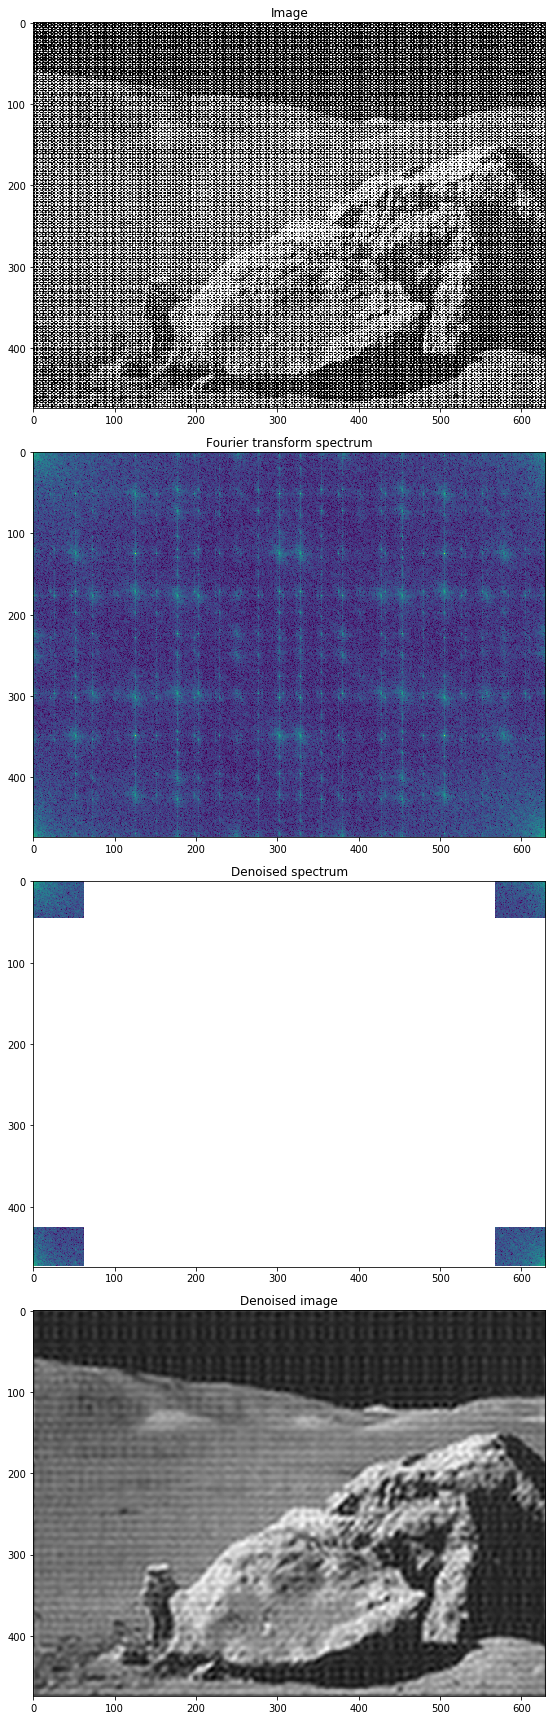

In [171]:
#Exercise: Denoise moon landing image

from scipy import fftpack
from matplotlib.colors import LogNorm

img = plt.imread('moonlanding.png')
img_fft = fftpack.fft2(img)

keep_fraction = 0.1
img_fft2 = img_fft.copy()
r, c = img_fft2.shape

img_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
img_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

img_new = fftpack.ifft2(img_fft2).real

fig, axes = plt.subplots(nrows=4, figsize=(8, 24))
axes[0].set_title("Image")
axes[0].imshow(img, plt.cm.gray)
axes[1].set_title("Fourier transform spectrum")
axes[1].imshow(np.abs(img_fft), norm=LogNorm(vmin=5))
axes[2].set_title("Denoised spectrum")
axes[2].imshow(np.abs(img_fft2), norm=LogNorm(vmin=5))
axes[3].set_title("Denoised image")
axes[3].imshow(img_new, plt.cm.gray)
fig.tight_layout()
plt.show()

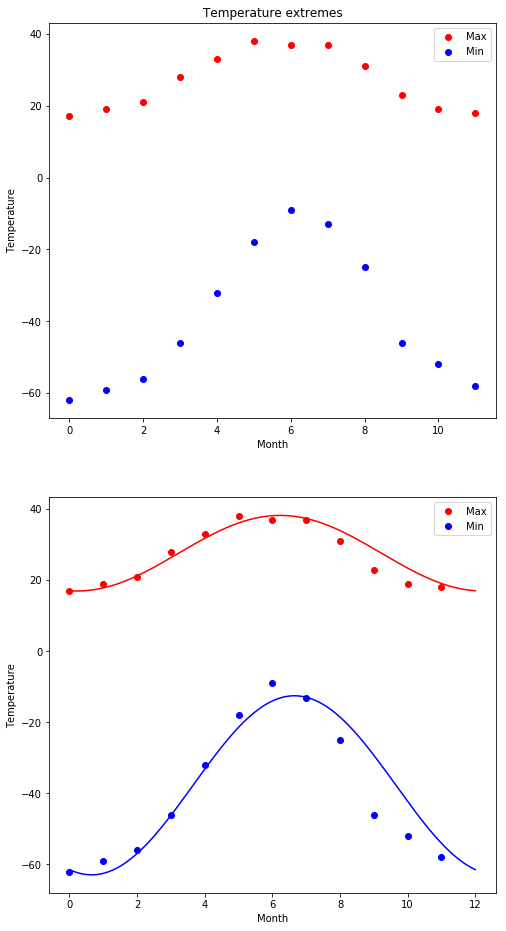

In [187]:
#Exercise: Curve fitting of temperature data

from scipy import optimize

tmax = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
tmin = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.arange(12)
days = np.linspace(0, 12, num=365)

def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos(2 * np.pi * (times + time_offset) / times.max()))

xmax, ymax = optimize.curve_fit(yearly_temps, months, tmax, [20, 10, 0])
xmin, ymin = optimize.curve_fit(yearly_temps, months, tmin, [-40, 20, 0])

fig, axes = plt.subplots(nrows=2, figsize=(8, 16))
axes[0].set_title("Temperature extremes")
axes[0].plot(months, tmax, 'ro', label = 'Max')
axes[0].plot(months, tmin, 'bo', label = 'Min')
axes[0].legend()
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Temperature')
axes[1].plot(months, tmax, 'ro', label = 'Max')
axes[1].plot(months, tmin, 'bo', label = 'Min')
axes[1].plot(days, yearly_temps(days, *xmax), 'r')
axes[1].plot(days, yearly_temps(days, *xmin), 'b')
axes[1].legend()
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Temperature')
plt.show()

Global minimum =  [ 0.08985543 -0.71264841] 

f(x0,y0) =  -1.0316284521568724 



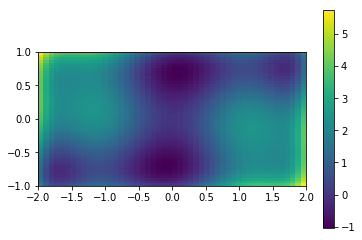

In [271]:
#Exercise: 2-D minimization

def sixhump(x):
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0]*x[1] + (-4 + 4*x[1]**2) * x[1]**2)

x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)
plt.figure()
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1])
plt.colorbar()
rranges = (slice(-2, 2, 0.25), slice(-1, 1, 0.25))
resbrute = optimize.brute(sixhump, rranges, full_output=True, finish=optimize.fmin)
axis.set_xlabel('x')
axis.set_ylabel('y')
axis.set_zlabel('f(x, y)')
print("Global minimum = ", resbrute[0], "\n")
print("f(x0,y0) = ", resbrute[1], "\n")
plt.show()

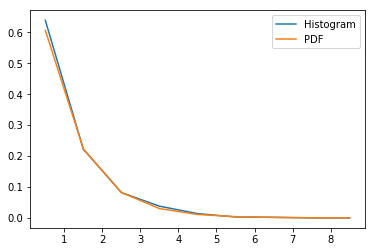

Shape parameter: 0.9806469772247537


In [420]:
#Exercise: Probability distributions

from scipy import stats
t=1
a = np.random.gamma(t, size=1000)
bins = np.arange(0, 10)
histogram = np.histogram(a, bins=bins, normed=True)[0]
bins = 0.5*(bins[1:] + bins[:-1])
b = stats.gamma.pdf(bins,t)

plt.plot(bins, histogram, label = 'Histogram')
plt.plot(bins, b, label = 'PDF')
plt.legend()
plt.show()

r = stats.gamma.fit(a,t)
print("Shape parameter:", r[0])

In [400]:
#Exercise: Check that opening amounts to eroding, then dilating.

a = np.zeros((5,5), dtype=np.int)
a[1:4, 1:4] = 1; a[4, 4] = 1; a[0, 0] = 1
print("Matrix")
print(a)

b = ndimage.binary_opening(a).astype(np.int)
print("Opening")
print(b)

b = ndimage.binary_erosion(a).astype(a.dtype)
b = ndimage.binary_dilation(b).astype(a.dtype)
print("Erosion then dilation")
print(b)


Matrix
[[1 0 0 0 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 0 0 0 1]]
Opening
[[0 0 0 0 0]
 [0 0 1 0 0]
 [0 1 1 1 0]
 [0 0 1 0 0]
 [0 0 0 0 0]]
Erosion then dilation
[[0 0 0 0 0]
 [0 0 1 0 0]
 [0 1 1 1 0]
 [0 0 1 0 0]
 [0 0 0 0 0]]


In [418]:
#Exercise: Check that the area of the reconstructed square is smaller than the area of the initial square.

from scipy import ndimage

a = np.zeros((50, 50))
a[10:-10, 10:-10] = 1
a += 0.25*np.random.standard_normal(a.shape)
mask = a>=0.5
opened_mask = ndimage.binary_opening(mask)
closed_mask = ndimage.binary_closing(opened_mask)

900 - np.sum(closed_mask)

17